![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

The Finance Toolkit is complimented very well with the [Finance Database 🌎](https://github.com/JerBouma/FinanceDatabase), a database that features 300.000+ symbols containing Equities, ETFs, Funds, Indices, Currencies, Cryptocurrencies and Money Markets. By utilising both, it is possible to do a fully-fledged competitive analysis with the tickers found from the FinanceDatabase inputted into the Finance Toolkit.

To install the **FinanceDatabase** it simply requires the following:

```
pip install financedatabase -U
```

From within Python use:

```python
import financedatabase as fd
```

For a detailed explanation of how to use the Finance Database, please see the GitHub page as found [here](https://github.com/JerBouma/FinanceDatabase).

To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://www.jeroenbouma.com/fmp">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use [their contact form](https://site.financialmodelingprep.com/contact) or provide the data yourself. 

In [1]:
from financetoolkit import Toolkit
import financedatabase as fd

API_KEY = "FINANCIAL_MODELING_PREP_KEY"

Lets start with searching for companies matching the industry `Road & Rail` in the `United States` that are defined as `Large Cap`.

In [2]:
# Initialize the Equities database
equities = fd.Equities()

# Obtain related companies
road_and_rail = equities.search(
    industry="Road & Rail",
    country="United States",
    market_cap="Large Cap",
    exclude_exchanges=True,
)

# Show the related DataFrame
road_and_rail

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
CSX,CSX Corporation,"CSX Corporation, together with its subsidiarie...",USD,Industrials,Transportation,Road & Rail,NMS,NASDAQ Global Select,United States,FL,Jacksonville,32202,http://www.csx.com,Large Cap,US1264081035,126408103,BBG000BGK1N1,BBG000BGJRC8,BBG001S5Q7Q3
KSU,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
KSU-P,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
NSC,Norfolk Southern Corporation,"Norfolk Southern Corporation, together with it...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,VA,Norfolk,23510-2191,http://www.norfolksouthern.com,Large Cap,US6558441084,655844108,BBG000BQ5GM4,BBG000BQ5DS5,BBG001S5TQJ6
UNP,Union Pacific Corporation,"Union Pacific Corporation, through its subsidi...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,NE,Omaha,68179,http://www.up.com,Large Cap,US9078181081,907818108,BBG000BW3413,BBG000BW3299,BBG001S5X2M0
WAB,Westinghouse Air Brake Technologies Corporation,Westinghouse Air Brake Technologies Corporatio...,USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212,http://www.wabteccorp.com,Large Cap,US9297401088,929740108,BBG000BDDBD5,BBG000BDD940,BBG001S5XBT3


It appears that Kansas City Southern has been merged with Canadian Pacific Railway ([source](https://www.kcsouthern.com/media/news/news-releases/canadian-pacific-and-kansas-city-southern-combination-approved-by-u-s-surface-transportation-board)). Because of this, the ticker is taken out. The reason it still exists in the dataset of the FinanceDatabase is to control for survivorship bias.

In [3]:
road_and_rail = road_and_rail.drop(["KSU", "KSU-P"])

From here on, the tickers from the dataset are used to initialize the Finance Toolkit.

In [4]:
rail_companies = Toolkit(list(road_and_rail.index), api_key=API_KEY)

Let's start by showing the historical prices and plotting them accordingly.

Obtaining historical data: 100%|██████████| 5/5 [00:00<00:00,  9.47it/s]


Open                                  High                   \
             CSX    NSC    UNP    WAB Benchmark    CSX      NSC     UNP   
date                                                                      
2014-01-07  9.43   90.4  82.69  73.28    183.09   9.48    90.74   83.45   
2014-01-08  9.42  90.54  83.93  73.12    183.45   9.47    90.63    84.5   
2014-01-09  9.43   90.3   83.6  72.88    184.11   9.56    91.38   84.67   
2014-01-10  9.59   91.0  84.42  73.38    183.95   9.65    91.83   85.44   
2014-01-13  9.61  91.64  85.17  73.49    183.67   9.66    92.04   85.35   
...          ...    ...    ...    ...       ...    ...      ...     ...   
2023-12-29 34.69  236.5 245.99 126.94    476.49  34.78   237.23 246.535   
2024-01-02 34.64 235.57 244.98  126.0    472.16 34.975   238.24  245.99   
2024-01-03 34.64 235.58  242.8 125.36    470.43  34.92   235.58 243.959   
2024-01-04 34.59 232.78 241.24 124.96     468.3 34.975 233.4134  244.08   
2024-01-05 34.67 231.08  241.9 124.12    467.49  34.77   231.14   241.9   

                              ... Excess Volatility                       \
               WAB Benchmark  ...               CSX    NSC    UNP    WAB   
date                          ...                                          
2014-01-07    73.6    183.79  ...              0.02 0.0197 0.0185 0.0216   
2014-01-08   73.55    183.83  ...              0.02 0.0197 0.0185 0.0216   
2014-01-09   73.46    184.13  ...              0.02 0.0197 0.0185 0.0216   
2014-01-10   73.71    184.22  ...              0.02 0.0197 0.0185 0.0216   
2014-01-13   73.69    184.18  ...              0.02 0.0197 0.0185 0.0216   
...            ...       ...  ...               ...    ...    ...    ...   
2023-12-29  127.48    477.03  ...              0.02 0.0197 0.0185 0.0216   
2024-01-02  127.14    473.67  ...              0.02 0.0197 0.0185 0.0216   
2024-01-03  125.46    471.19  ...              0.02 0.0197 0.0185 0.0216   
2024-01-04 125.685    470.96  ...              0.02 0.0197 0.0185 0.0216   
2024-01-05  124.88    468.45  ...              0.02 0.0197 0.0185 0.0216   

                     Cumulative Return                                 
           Benchmark               CSX    NSC    UNP    WAB Benchmark  
date                                                                   
2014-01-07    0.0143               1.0    1.0    1.0    1.0       1.0  
2014-01-08    0.0143            0.9963 0.9931 1.0018  0.996    1.0002  
2014-01-09    0.0143            1.0112 1.0085 1.0159 1.0019    1.0008  
2014-01-10    0.0143            1.0187 1.0116 1.0226 1.0074    1.0036  
2014-01-13    0.0143            1.0037 0.9961 1.0085 0.9937    0.9902  
...              ...               ...    ...    ...    ...       ...  
2023-12-29    0.0143            4.3176 3.2582 3.6523 1.8306    3.1038  
2024-01-02    0.0143            4.3113 3.2482 3.6198 1.8161    3.0864  
2024-01-03    0.0143            4.3163 3.2112 3.5941 1.7986    3.0612  
2024-01-04    0.0143            4.3238 3.1843 3.5845 1.7887    3.0513  
2024-01-05    0.0143            4.3213  3.173 3.5822 1.7989    3.0589  

[2517 rows x 60 columns]

<Axes: title={'center': 'Cumulative Returns for the Rail Companies'}, xlabel='date'>

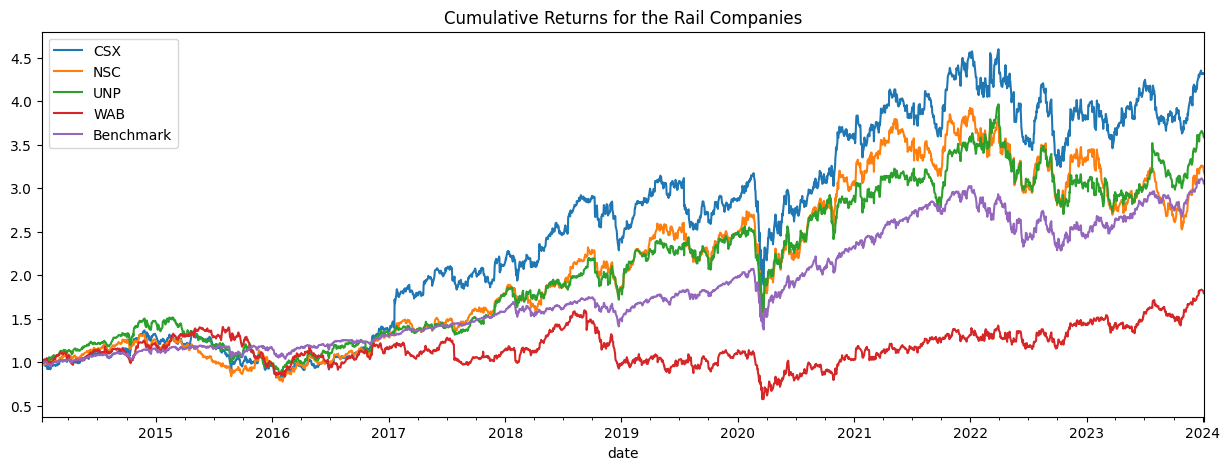

In [5]:
# Collect Historical Data for each ticker
historical_data = rail_companies.get_historical_data()

# Show a portion of the dataset
display(historical_data)

# Plot the Cumulative Returns
historical_data["Cumulative Return"].plot(
    figsize=(15, 5), title="Cumulative Returns for the Rail Companies"
)

Let's have a look at the Balance Sheet Statement as well.

In [6]:
# Collect and show the Balance Sheet Statements
rail_companies.get_balance_sheet_statement()

Obtaining exchange data: 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]


date                                        2014         2015         2016  \
CSX Cash and Cash Equivalents        669000000.0  628000000.0  603000000.0   
    Short Term Investments           292000000.0  810000000.0  417000000.0   
    Cash and Short Term Investments  961000000.0 1438000000.0 1020000000.0   
    Accounts Receivable             1129000000.0  982000000.0  938000000.0   
    Inventory                        273000000.0  350000000.0  407000000.0   
...                                          ...          ...          ...   
WAB Minority Interest                  1056000.0    1732000.0  770848000.0   
    Total Liabilities and Equity    3303841000.0 3300335000.0 6581018000.0   
    Total Investments                -43953000.0  -71658000.0 -245680000.0   
    Total Debt                       521195000.0  695727000.0 1892776000.0   
    Net Debt                          95346000.0  469536000.0 1494292000.0   

date                                        2017         2018          2019  \
CSX Cash and Cash Equivalents        401000000.0  858000000.0   958000000.0   
    Short Term Investments            18000000.0  253000000.0   996000000.0   
    Cash and Short Term Investments  419000000.0 1111000000.0  1954000000.0   
    Accounts Receivable              970000000.0 1010000000.0   986000000.0   
    Inventory                        372000000.0  263000000.0   261000000.0   
...                                          ...          ...           ...   
WAB Minority Interest                 19664000.0    3944000.0    37100000.0   
    Total Liabilities and Equity    6579980000.0 8649234000.0 18886200000.0   
    Total Investments               -175902000.0 -198269000.0  -145300000.0   
    Total Debt                      1870528000.0 3792774000.0  4333600000.0   
    Net Debt                        1637127000.0 3211866000.0  3729400000.0   

date                                         2020          2021          2022  
CSX Cash and Cash Equivalents        3129000000.0  2239000000.0  1958000000.0  
    Short Term Investments              2000000.0    77000000.0   129000000.0  
    Cash and Short Term Investments  3131000000.0  2316000000.0  2087000000.0  
    Accounts Receivable               912000000.0  1148000000.0  1313000000.0  
    Inventory                         302000000.0   339000000.0   341000000.0  
...                                           ...           ...           ...  
WAB Minority Interest                  30400000.0    38000000.0    45000000.0  
    Total Liabilities and Equity    18454500000.0 18454000000.0 18516000000.0  
    Total Investments                -168400000.0  -288000000.0           0.0  
    Total Debt                       3792200000.0  4056000000.0  4002000000.0  
    Net Debt                         3193500000.0  3583000000.0  3461000000.0  

[172 rows x 9 columns]

A very important financial ratio is the "Operating Ratio" for railroad companies. An operating ratio of 80 or lower has generally been seen as good but having a target as low as the mid-70s is even better. From the table below, it is clear that all companies except for WAB (Westinghouse Air Brake Technologies Corporation) are performing very well. This, however, makes sense since WAB is specialized on providing parts instead of actual railroad services.

In [7]:
# Collect and show the Balance Sheet Statements
rail_companies.ratios.get_operating_ratio()

Obtaining financial statements: 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


date,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,0.7129,0.7049,0.698,0.6711,0.6164,0.5991,0.5896,0.5958,0.6195
NSC,0.6924,0.7256,0.6891,0.6601,0.6545,0.6469,0.654,0.6009,0.6227
UNP,0.6351,0.6309,0.6353,0.6205,0.627,0.606,0.5989,0.5717,0.6013
WAB,0.8269,0.8163,0.8436,0.8915,0.8915,0.9191,0.9015,0.888,0.8791


Other than this ratio, important other metrics are revenue growth, strong profit margins and efficient capital management. These can be explored further by looking into the income statement, the profit margin ratio and the current ratio.

In [8]:
# Obtain the income statement and select the revenues
revenues = rail_companies.get_income_statement().loc[:, "Revenue", :]

# Show revenue absolute numbers for each company
display(revenues)

# Show the revenue growth for each company
rail_companies.get_income_statement(growth=True).loc[:, "Revenue", :]

date,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,12669000000.0,11811000000.0,11069000000.0,11408000000.0,12250000000.0,11937000000.0,10583000000.0,12522000000.0,14853000000.0
NSC,11624000000.0,10511000000.0,9888000000.0,10551000000.0,11458000000.0,11296000000.0,9789000000.0,11142000000.0,12745000000.0
UNP,23988000000.0,21813000000.0,19941000000.0,21240000000.0,22832000000.0,21708000000.0,19533000000.0,21804000000.0,24875000000.0
WAB,3044454000.0,3307998000.0,2931188000.0,3881756000.0,4363547000.0,8200000000.0,7556100000.0,7822000000.0,8362000000.0


date,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,NaN,-0.0677,-0.0628,0.0306,0.0738,-0.0256,-0.1134,0.1832,0.1862
NSC,NaN,-0.0958,-0.0593,0.0671,0.086,-0.0141,-0.1334,0.1382,0.1439
UNP,NaN,-0.0907,-0.0858,0.0651,0.075,-0.0492,-0.1002,0.1163,0.1408
WAB,NaN,0.0866,-0.1139,0.3243,0.1241,0.8792,-0.0785,0.0352,0.069


Profit Margins can be looked at from a variety of perspectives. The Finance Toolkit features Gross, Operating, Net Profit and EBT Profit Margins. With the `collect_profitability_ratios` functions within the `ratios` module these can be collected for each company accompanied with many other useful ratios. To provide an appropriate overview, the profitability ratios are only shown for `CSX`.

In [9]:
# Collect the profitability ratios and select the ratios for CSX
rail_companies.ratios.collect_profitability_ratios().loc["CSX"]

Obtaining financial statements: 0it [00:00, ?it/s]


date,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gross Margin,0.2852,0.3034,0.3062,0.3307,0.3896,0.4083,0.4122,0.4105,0.3895
Operating Margin,0.2852,0.3034,0.3062,0.3214,0.3975,0.4159,0.4122,0.4467,0.4055
Net Profit Margin,0.1521,0.1666,0.1548,0.4796,0.2701,0.279,0.2613,0.3019,0.2805
Interest Coverage Ratio,8.7413,8.8088,8.1002,9.1245,9.7027,8.6866,7.6446,9.1953,9.9973
Income Before Tax Profit Margin,0.2403,0.2657,0.2476,0.2754,0.3513,0.3616,0.3427,0.3954,0.3645
Effective Tax Rate,0.367,0.3728,0.3747,-0.7412,0.2312,0.2282,0.2377,0.2363,0.2305
Return on Assets (ROA),NaN,0.0578,0.0487,0.1538,0.0913,0.0888,0.0709,0.0941,0.1011
Return on Equity (ROE),NaN,0.1723,0.1467,0.4142,0.2423,0.2722,0.2212,0.284,0.3187
Return on Invested Capital (ROIC),NaN,0.1226,0.1056,0.2496,0.1507,0.1476,0.123,0.1548,0.1657
Return on Capital Employed (ROCE),0.116,0.1113,0.0995,0.109,0.142,0.1399,0.116,0.1481,0.1561


Capital Management can be viewed from multiple angles including liquidity, accounts receivable, inventory and accounts payable management. These lead to the Operating and Cash Conversion Cycles. All of these ratios can be found within the `collect_efficiency_ratios` and `collect_liquidity_ratios` functions within the `ratios` module.

In [10]:
# Collect the liquidity ratios for all companies
rail_companies.ratios.collect_liquidity_ratios()

Obtaining financial statements: 0it [00:00, ?it/s]


date                                          2014         2015         2016  \
CSX Current Ratio                           1.2207       1.5195       1.2191   
    Quick Ratio                             0.9919       1.2398       0.9598   
    Cash Ratio                              0.4561       0.7367          0.5   
    Working Capital                    465000000.0 1014000000.0  447000000.0   
    Operating Cash Flow Ratio               1.5866       1.7264       1.4907   
    Operating Cash Flow to Sales Ratio      0.2639       0.2853       0.2747   
    Short Term Coverage Ratio               6.0018       5.9331       5.6419   
NSC Current Ratio                           1.5607       1.1802       0.9795   
    Quick Ratio                             1.1393       0.9175       0.8127   
    Cash Ratio                              0.5466       0.4935       0.4087   
    Working Capital                    998000000.0  402000000.0  -48000000.0   
    Operating Cash Flow Ratio               1.6022       1.2896       1.2971   
    Operating Cash Flow to Sales Ratio      0.2454       0.2737       0.3068   
    Short Term Coverage Ratio              49.1724      22.8333    -233.3846   
UNP Current Ratio                           1.2428       1.2882       0.9879   
    Quick Ratio                             0.8491       0.8568       0.7129   
    Cash Ratio                              0.4212       0.4339       0.3673   
    Working Capital                    914000000.0  924000000.0  -44000000.0   
    Operating Cash Flow Ratio               1.9615       2.2907       2.0673   
    Operating Cash Flow to Sales Ratio      0.3079       0.3367       0.3774   
    Short Term Coverage Ratio               5.1072        5.444       7.3775   
WAB Current Ratio                           2.2169       2.4256       1.9823   
    Quick Ratio                             1.4308        1.241        0.927   
    Cash Ratio                              0.5764       0.3403       0.2755   
    Working Capital                    899062000.0  947672000.0 1420992000.0   
    Operating Cash Flow Ratio               0.6394       0.6743       0.3106   
    Operating Cash Flow to Sales Ratio      0.1552       0.1355       0.1533   
    Short Term Coverage Ratio               0.6364       0.5915       0.4196   

date                                           2017         2018         2019  \
CSX Current Ratio                            1.0111       1.3394       1.5239   
    Quick Ratio                              0.7334       1.1076       1.3668   
    Cash Ratio                               0.2212       0.5802       0.9084   
    Working Capital                      21000000.0  650000000.0 1127000000.0   
    Operating Cash Flow Ratio                1.8332       2.4235       2.2548   
    Operating Cash Flow to Sales Ratio       0.3043       0.3789       0.4063   
    Short Term Coverage Ratio                7.0141      14.3241      23.7745   
NSC Current Ratio                            0.8444       0.7186       0.9048   
    Quick Ratio                              0.6464       0.5276       0.6522   
    Cash Ratio                               0.2711       0.1382       0.2522   
    Working Capital                    -396000000.0 -729000000.0 -219000000.0   
    Operating Cash Flow Ratio                1.2782       1.4381       1.6922   
    Operating Cash Flow to Sales Ratio       0.3083       0.3252       0.3445   
    Short Term Coverage Ratio              -14.5223     -12.8927     -14.7424   
UNP Current Ratio                            1.0251       0.8999        0.795   
    Quick Ratio                              0.7256       0.6675       0.5714   
    Cash Ratio                               0.3465       0.2882       0.2048   
    Working Capital                      99000000.0 -463000000.0 -892000000.0   
    Operating Cash Flow Ratio                1.8355       1.8776       1.9786   
    Operating Cash Flow to Sales Ratio       0.3404       0

In [11]:
# Collect the efficiency ratios for all companies
rail_companies.ratios.collect_efficiency_ratios()

Obtaining financial statements: 0it [00:00, ?it/s]


date                                             2014     2015     2016  \
CSX Days of Inventory Outstanding (DIO)           NaN    13.82  17.9886   
    Days of Sales Outstanding (DSO)               NaN  32.6185   31.656   
    Operating Cycle (CC)                          NaN  46.4386  49.6446   
    Days of Accounts Payable Outstanding (DPO)    NaN  35.6925  37.3079   
    Cash Conversion Cycle (CCC)                   NaN   10.746  12.3366   
    Cash Conversion Efficiency (CCE)           0.2639   0.2853   0.2747   
    Receivables Turnover                          NaN   0.0894   0.0867   
    Inventory Turnover Ratio                      NaN  26.4109  20.2906   
    Accounts Payable Turnover Ratio               NaN  10.2262   9.7834   
    SGA-to-Revenue Ratio                          0.0      0.0      0.0   
    Fixed Asset Turnover                          NaN   0.3776   0.3406   
    Asset Turnover Ratio                          NaN   0.3469   0.3142   
    Operating Ratio                            0.7129   0.7049    0.698   
NSC Days of Inventory Outstanding (DIO)           NaN  13.9118    16.02   
    Days of Sales Outstanding (DSO)               NaN  34.7429  34.9016   
    Operating Cycle (CC)                          NaN  48.6547  50.9216   
    Days of Accounts Payable Outstanding (DPO)    NaN  63.7694  69.9659   
    Cash Conversion Cycle (CCC)                   NaN -15.1147 -19.0443   
    Cash Conversion Efficiency (CCE)           0.2454   0.2737   0.3068   
    Receivables Turnover                          NaN   0.0952   0.0956   
    Inventory Turnover Ratio                      NaN  26.2367  22.7841   
    Accounts Payable Turnover Ratio               NaN   5.7238   5.2168   
    SGA-to-Revenue Ratio                       0.0095   0.0131    0.002   
    Fixed Asset Turnover                          NaN   0.3386   0.3079   
    Asset Turnover Ratio                          NaN   0.3114    0.286   
    Operating Ratio                            0.6924   0.7256   0.6891   
UNP Days of Inventory Outstanding (DIO)           NaN  20.5858  22.7187   
    Days of Sales Outstanding (DSO)               NaN  24.8236  23.9233   
    Operating Cycle (CC)                          NaN  45.4094   46.642   
    Days of Accounts Payable Outstanding (DPO)    NaN  23.0311  26.5494   
    Cash Conversion Cycle (CCC)                   NaN  22.3783  20.0926   
    Cash Conversion Efficiency (CCE)           0.3079   0.3367   0.3774   
    Receivables Turnover                          NaN    0.068   0.0655   
    Inventory Turnover Ratio                      NaN  17.7307  16.0661   
    Accounts Payable Turnover Ratio               NaN  15.8481  13.7479   
    SGA-to-Revenue Ratio                          0.0      0.0      0.0   
    Fixed Asset Turnover                          NaN   0.4429   0.3887   
    Asset Turnover Ratio                          NaN   0.4065   0.3615   
    Operating Ratio                            0.6351   0.6309   0.6353   
WAB Days of Inventory Outstanding (DIO)           NaN  79.8997 103.3997   
    Days of Sales Outstanding (DSO)               NaN  67.8591  95.9634   
    Operating Cycle (CC)                          NaN 147.7588  199.363   
    Days of Accounts Payable Outstanding (DPO)    NaN   58.086  77.2699   
    Cash Conversion Cycle (CCC)                   NaN  89.6728 122.0931   
    Cash Conversion Efficiency (CCE)           0.1552   0.1355   0.1533   
    Receivables Turnover                          NaN   0.1859   0.2629   
    Inventory Turnover Ratio                      NaN   4.5682     3.53   
    Accounts Payable Turnover Ratio               NaN   6.2838   4.7237   
    SGA-to-Revenue Ratio                       0.1066    0.105   0.1268   
    Fixed Asset Turnover                          NaN   1.9726   1.0854   
    Asset Turnover Ratio                          NaN   1.0018   0.5933   
    Operating Ratio                            0.8269   0.8163   0.8436   

date                    